<div style="background-color:#0D1B2A; color:white; padding:15px; border-radius:10px;">
  <h1 style="text-align:center;">🏦 Bank Customer Churn Prediction</h1>
  <p style="text-align:center;">Customer Churn Prediction Using Machine Learning</p>
</div>

<div style="
    border-radius: 18px;
    padding: 30px 40px;
    text-align: center;
    background: linear-gradient(135deg, #b8860b, #8b6508);
    color: #fceec7;
    font-family: Arial, sans-serif;
    width: 70%;
    margin: auto;
    box-shadow: 0 4px 18px rgba(0,0,0,0.25);
">

<h1 style="font-size: 36px; margin-bottom: 8px;">Mesut Karagöz</h1>

<h2 style="font-size: 22px; font-weight: 500; margin-top: 0;">
Data Analyst | Data Scientist
</h2>

<div style="margin-top: 25px; display: flex; justify-content: center; gap: 20px;">

  <a href="https://www.linkedin.com/in/mesut-karagöz-181733260/" target="_blank" style="
      text-decoration:none;
      background:#0072b1;
      color:white;
      padding:12px 26px;
      border-radius:10px;
      font-size:17px;
      display:inline-block;">
      LinkedIn
  </a>
  <a href="https://github.com/Mst-KrgZ" target="_blank" style="
      text-decoration:none;
      background:#24292e;
      color:white;
      padding:12px 26px;
      border-radius:10px;
      font-size:17px;
      display:inline-block;">
      GitHub
  </a>

</div>

</div>

<div style="
    border-left: 6px solid #1F6FEB;
    background: #0d1117;
    padding: 20px 25px;
    border-radius: 8px;
    color:white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin-top: 0;">📌 Introduction</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        Customer churn is one of the most critical problems in the banking sector. <br>
        Identifying customers who are likely to leave the bank enables institutions 
        to take proactive measures that improve customer satisfaction and reduce financial losses.
        <br>
        In this project, we use Machine Learning techniques to analyze bank customer data 
        and predict whether a customer will churn (exit) or stay.
    </p>
</div>

<div style="
    border-left: 6px solid #1F6FEB;
    background: #0d1117;
    padding: 20px 25px;
    border-radius: 8px;
    color:white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin-top: 0;">🎯 Project Goals</h2>
    <p style="font-size: 16px; line-height: 1.6;">
- Analyze customer behavior patterns <br>
- Perform Exploratory Data Analysis (EDA)  <br>
- Apply data preprocessing and feature engineering  <br>
- Build multiple ML models (Logistic Regression, Random Forest, XGBoost, CatBoost, SVM, LightGBM, etc.)  <br>
- Compare performance metrics and select the best model <br> 
- Provide actionable insights for reducing churn  
    </p>
</div>

<div style="border-left:6px solid #1F6FEB; background:#0d1117; padding:20px 25px; border-radius:8px; color:white;">
<h2>📦 Imports & Setup</h2></div>

In [1]:
# ── Data & Math ──────────────────────────────────────────
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# ── Visualization ─────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# ── Preprocessing ─────────────────────────────────────────
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ── Class Imbalance ───────────────────────────────────────
from imblearn.over_sampling import SMOTE

# ── Models ────────────────────────────────────────────────
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# ── Metrics ───────────────────────────────────────────────
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                              f1_score, roc_auc_score, confusion_matrix,
                              classification_report, precision_recall_curve, roc_curve)

# ── Explainability ────────────────────────────────────────
import shap

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


<div style="border-left:6px solid #1F6FEB; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>📥 Load Data</h2></div>

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Remove non-predictive columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(f"After drop: {df.shape}")
df.info()

After drop: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


📌 Why These Columns Are Removed?

RowNumber

This column only represents the index position of each row in the dataset.

It does not contain any meaningful information that contributes to predicting churn.

Keeping it would only introduce noise.

CustomerId

Although it uniquely identifies each customer, it does not contain predictive value.

Machine learning models should not learn from arbitrary ID numbers.

Including it may mislead the model by introducing patterns that do not reflect real behavior.

Surname

A customer's last name has no relationship with churn behavior.

It is purely irrelevant and may even inject random noise into the model.

Therefore, removing it increases model clarity and reduces unnecessary dimensionality.

🧠 Summary

Removing irrelevant or non-informative features helps:

Reduce noise in the model

Improve training speed

Increase model accuracy

Prevent overfitting

Focus the model on meaningful customer behavior patterns

<div style="border-left:6px solid #F72585; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>⚙️ Feature Engineering (Banking-Inspired)</h2>
<p>New features derived from domain knowledge to capture hidden patterns.</p></div>

In [4]:
df["Balance_Salary_Ratio"]  = df["Balance"] / (df["EstimatedSalary"] + 1)
df["Tenure_Age_Ratio"]      = df["Tenure"] / (df["Age"] + 1)
df["Is_Senior"]             = (df["Age"] >= 60).astype(int)
df["CreditScore_Age_Ratio"] = df["CreditScore"] / (df["Age"] + 1)
df["Products_x_Active"]     = df["NumOfProducts"] * df["IsActiveMember"]
df["IsBalanceZero"]         = (df["Balance"] == 0).astype(int)

print("New features added:", ["Balance_Salary_Ratio","Tenure_Age_Ratio","Is_Senior",
                               "CreditScore_Age_Ratio","Products_x_Active","IsBalanceZero"])
df.head()

New features added: ['Balance_Salary_Ratio', 'Tenure_Age_Ratio', 'Is_Senior', 'CreditScore_Age_Ratio', 'Products_x_Active', 'IsBalanceZero']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Salary_Ratio,Tenure_Age_Ratio,Is_Senior,CreditScore_Age_Ratio,Products_x_Active,IsBalanceZero
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.046512,0,14.395349,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0.023810,0,14.476190,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0.186047,0,11.674419,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025000,0,17.475000,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,0.045455,0,19.318182,1,0


<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>📊 EDA — Exploratory Data Analysis</h2></div>

In [5]:
# Missing & Duplicates
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Balance_Salary_Ratio     0
Tenure_Age_Ratio         0
Is_Senior                0
CreditScore_Age_Ratio    0
Products_x_Active        0
IsBalanceZero            0
dtype: int64

Duplicate rows: 0


Exited
0    7963
1    2037
Name: count, dtype: int64

Churn Rate: 20.37%


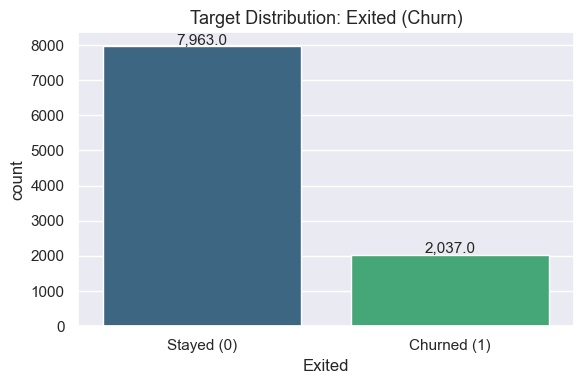

In [6]:
# Target Distribution
print(df['Exited'].value_counts())
print("\nChurn Rate: {:.2f}%".format(df['Exited'].mean()*100))

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Exited', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+p.get_width()/2, p.get_height()+50), ha='center', fontsize=11)
plt.title('Target Distribution: Exited (Churn)', fontsize=13)
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

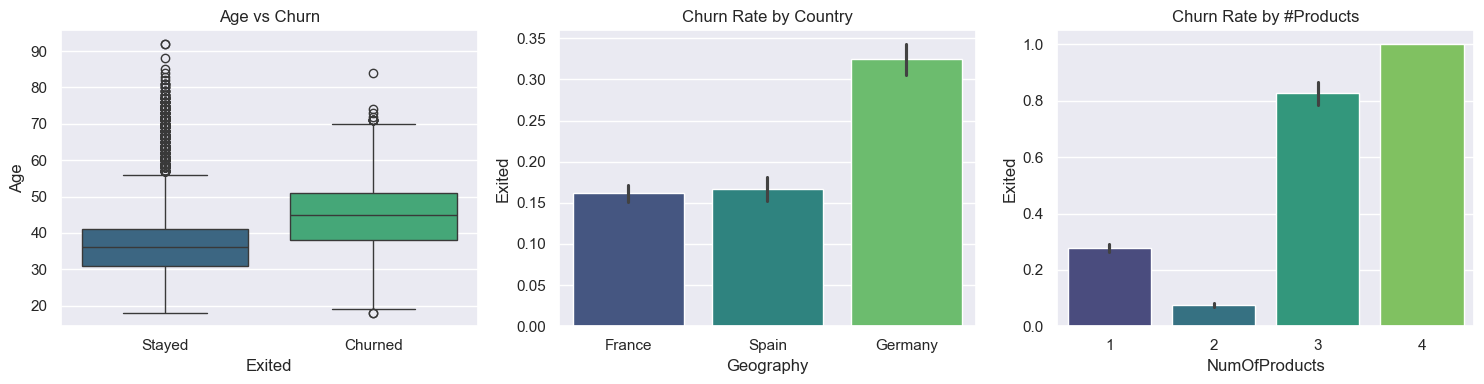

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(data=df, x='Exited', y='Age', palette='viridis', ax=axes[0])
axes[0].set_title('Age vs Churn')
axes[0].set_xticks([0,1]); axes[0].set_xticklabels(['Stayed','Churned'])

sns.barplot(data=df, x='Geography', y='Exited', palette='viridis', ax=axes[1])
axes[1].set_title('Churn Rate by Country')

sns.barplot(data=df, x='NumOfProducts', y='Exited', palette='viridis', ax=axes[2])
axes[2].set_title('Churn Rate by #Products')

plt.tight_layout()
plt.show()

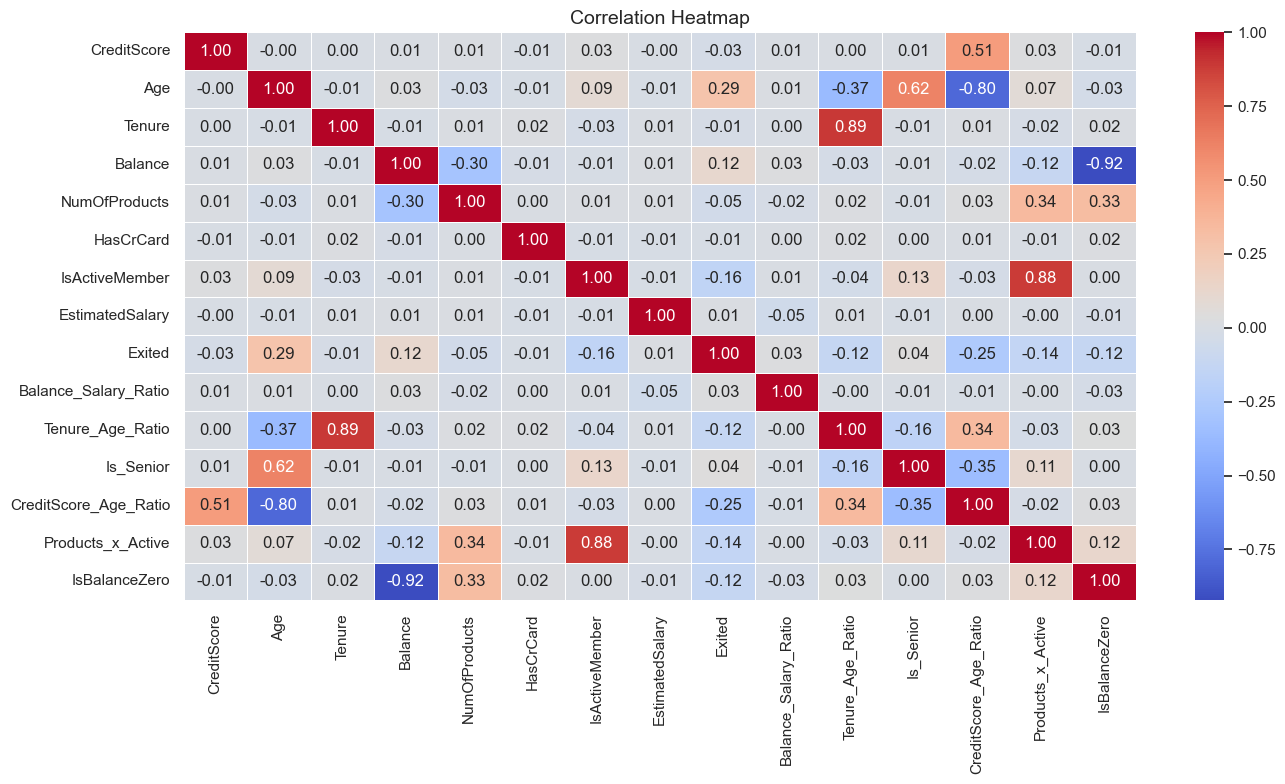

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

<div style="border-left:6px solid #F72585; background:#0d1117; padding:20px 25px; border-radius:8px; color:white; margin-top:20px;">
<h2>📊 Advanced EDA — Detailed Visualizations</h2>
<p>Missing value heatmap, pairplot, feature-vs-churn </p>
</div>

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>🟦 1 — Missing Values (missingno)</h3>
<p>White lines indicate missing values. It is also visually confirmed that there are no missing values in this dataset.</p>
</div>

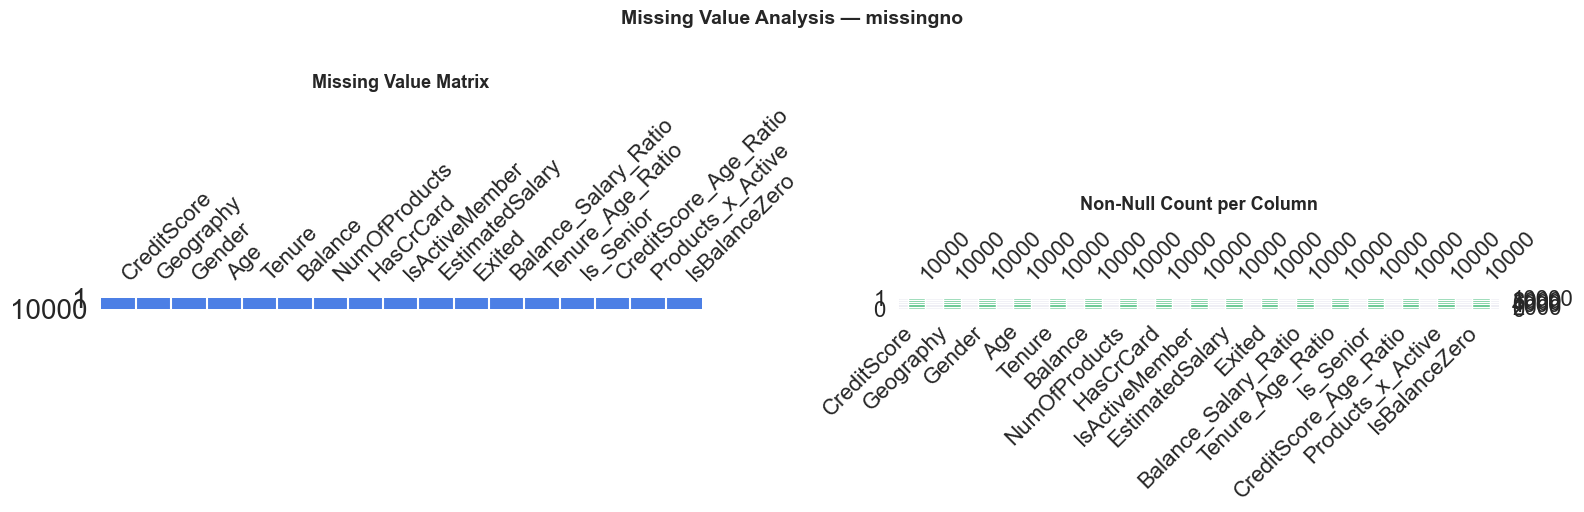


✅ Toplam eksik değer: 0
CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Balance_Salary_Ratio     0
Tenure_Age_Ratio         0
Is_Senior                0
CreditScore_Age_Ratio    0
Products_x_Active        0
IsBalanceZero            0
dtype: int64


In [ ]:
import missingno as msno

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Matrix plot
plt.sca(axes[0])
msno.matrix(df, ax=axes[0], sparkline=False, color=(0.3, 0.5, 0.9))
axes[0].set_title("Missing Value Matrix", fontsize=13, fontweight='bold', pad=12)

# Bar plot
plt.sca(axes[1])
msno.bar(df, ax=axes[1], color=(0.3, 0.75, 0.5))
axes[1].set_title("Non-Null Count per Column", fontsize=13, fontweight='bold', pad=12)

plt.suptitle("Missing Value Analysis — missingno", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n✅ Total missing values: {df.isnull().sum().sum()}")
print(df.isnull().sum())

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>💳 2 — Credit Score vs Churn (Box Plot)</h3>
<p>The credit score distribution is compared between churn and non-churn customers.<br>
The median, IQR, and outliers are displayed together.</p>
</div>

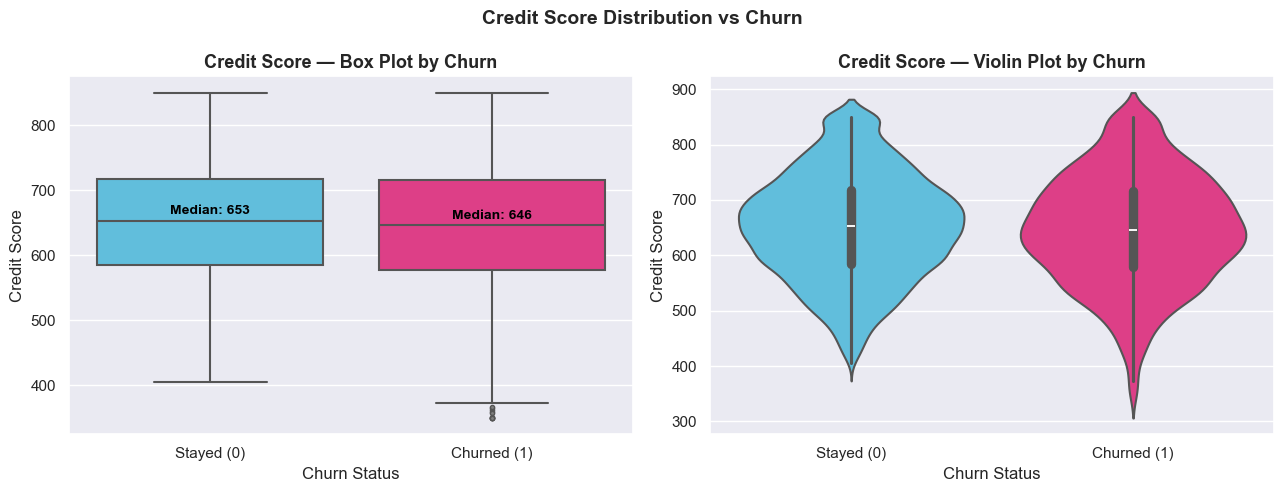

📊 Credit Score Stats by Churn:
         count    mean     std    min    25%    50%    75%    max
Exited                                                           
0       7963.0  651.85   95.65  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.35  100.32  350.0  578.0  646.0  716.0  850.0


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Box plot
sns.boxplot(data=df, x='Exited', y='CreditScore', palette=['#4CC9F0','#F72585'], ax=axes[0],
            linewidth=1.5, flierprops=dict(marker='o', markerfacecolor='gray', markersize=3))
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Stayed (0)', 'Churned (1)'], fontsize=11)
axes[0].set_title('Credit Score — Box Plot by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Churn Status'); axes[0].set_ylabel('Credit Score')

# Median annotations
for i, group in enumerate([0, 1]):
    median = df[df['Exited'] == group]['CreditScore'].median()
    axes[0].text(i, median + 10, f'Median: {median:.0f}', ha='center',
                fontsize=10, fontweight='bold', color='black')

# Violin plot 
sns.violinplot(data=df, x='Exited', y='CreditScore', palette=['#4CC9F0','#F72585'],
               ax=axes[1], inner='box', linewidth=1.5)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Stayed (0)', 'Churned (1)'], fontsize=11)
axes[1].set_title('Credit Score — Violin Plot by Churn', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Churn Status'); axes[1].set_ylabel('Credit Score')

plt.suptitle('Credit Score Distribution vs Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Stats
print("📊 Credit Score Stats by Churn:")
print(df.groupby('Exited')['CreditScore'].describe().round(2))

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>👤 3 — Churn Rate by Gender</h3>
<p>The churn rate and absolute counts are displayed together by gender.</p>
</div>

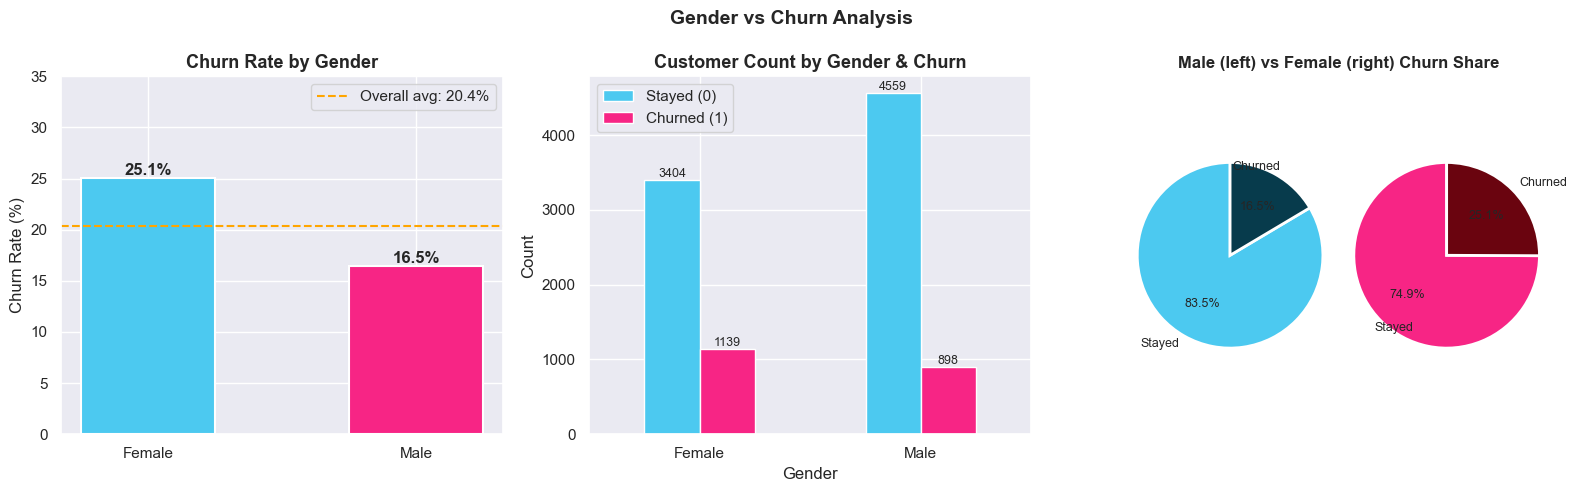

📊 Churn Rate by Gender:
        churn_rate  churned  total
Gender                            
Female    0.250715     1139   4543
Male      0.164559      898   5457


In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Churn rate bar
gender_churn = df.groupby('Gender')['Exited'].mean().reset_index()
gender_churn.columns = ['Gender', 'Churn Rate']
bars = axes[0].bar(gender_churn['Gender'], gender_churn['Churn Rate'] * 100,
                   color=['#4CC9F0', '#F72585'], edgecolor='white', linewidth=1.5, width=0.5)
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                f'{bar.get_height():.1f}%', ha='center', fontweight='bold', fontsize=12)
axes[0].set_title('Churn Rate by Gender', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)'); axes[0].set_ylim(0, 35)
axes[0].axhline(y=df['Exited'].mean()*100, color='orange', linestyle='--', lw=1.5, label=f'Overall avg: {df["Exited"].mean()*100:.1f}%')
axes[0].legend()

# 2. Count plot with churn overlay
gender_counts = df.groupby(['Gender','Exited']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', ax=axes[1], color=['#4CC9F0','#F72585'], edgecolor='white', linewidth=1, rot=0)
axes[1].set_title('Customer Count by Gender & Churn', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Gender'); axes[1].set_ylabel('Count')
axes[1].legend(['Stayed (0)', 'Churned (1)'])
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=9)

# 3. Pie charts side by side
for i, (gender, color) in enumerate([('Male','#4CC9F0'), ('Female','#F72585')]):
    if i == 0:
        ax_pie = axes[2]
    gender_data = df[df['Gender']==gender]['Exited'].value_counts()
    stayed  = gender_data.get(0, 0)
    churned = gender_data.get(1, 0)
    
wedge_props = dict(width=0.5, edgecolor='white', linewidth=2)
stayed_m  = df[df['Gender']=='Male']['Exited'].value_counts()
stayed_f  = df[df['Gender']=='Female']['Exited'].value_counts()

axes[2].pie([stayed_m.get(0,0), stayed_m.get(1,0)], labels=['Stayed','Churned'],
           autopct='%1.1f%%', startangle=90, colors=['#4CC9F0','#073B4C'],
           wedgeprops=dict(edgecolor='white', linewidth=2),
           textprops={'fontsize': 9}, radius=0.6, center=(-0.7, 0))
axes[2].pie([stayed_f.get(0,0), stayed_f.get(1,0)], labels=['Stayed','Churned'],
           autopct='%1.1f%%', startangle=90, colors=['#F72585','#6A040F'],
           wedgeprops=dict(edgecolor='white', linewidth=2),
           textprops={'fontsize': 9}, radius=0.6, center=(0.7, 0))
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_title('Male (left) vs Female (right) Churn Share', fontsize=12, fontweight='bold')
axes[2].axis('equal')

plt.suptitle('Gender vs Churn Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Churn Rate by Gender:")
print(df.groupby('Gender')['Exited'].agg(['mean','sum','count']).rename(columns={'mean':'churn_rate','sum':'churned','count':'total'}))

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>🎂 4 — Age Distribution Analysis</h3>
<p>Age distribution, churn vs. stayed comparison, and churn rate by age groups.</p>
</div>

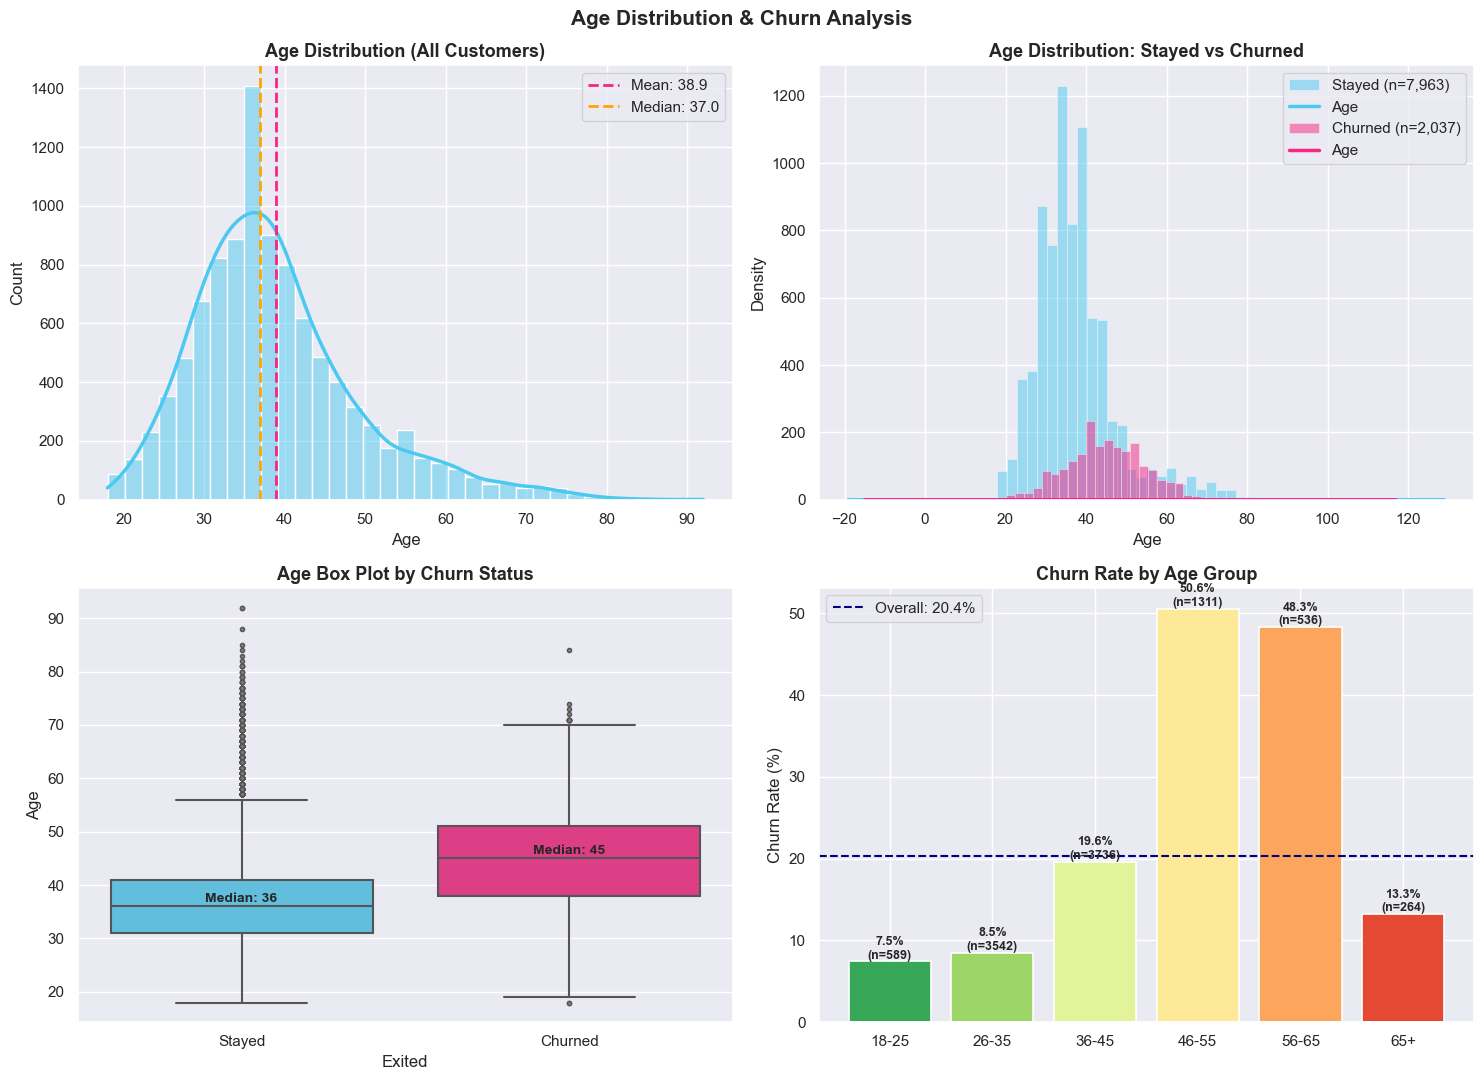

📊 Age Stats by Churn:
         count   mean    std   min   25%   50%   75%   max
Exited                                                    
0       7963.0  37.41  10.13  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.84   9.76  18.0  38.0  45.0  51.0  84.0


In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# 1. Overall histogram
sns.histplot(data=df, x='Age', kde=True, bins=35, color='#4CC9F0',
             line_kws={'lw': 2.5}, ax=axes[0][0])
axes[0][0].axvline(df['Age'].mean(), color='#F72585', linestyle='--', lw=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[0][0].axvline(df['Age'].median(), color='orange', linestyle='--', lw=2, label=f'Median: {df["Age"].median():.1f}')
axes[0][0].set_title('Age Distribution (All Customers)', fontsize=13, fontweight='bold')
axes[0][0].legend()

# 2. KDE: Stayed vs Churned
for exited, color, label in [(0,'#4CC9F0','Stayed'), (1,'#F72585','Churned')]:
    subset = df[df['Exited']==exited]['Age']
    axes[0][1].hist(subset, bins=30, alpha=0.5, color=color, label=f'{label} (n={len(subset):,})', edgecolor='white', linewidth=0.5)
    subset.plot.kde(ax=axes[0][1], color=color, lw=2.5)
axes[0][1].set_title('Age Distribution: Stayed vs Churned', fontsize=13, fontweight='bold')
axes[0][1].legend(); axes[0][1].set_xlabel('Age')

# 3. Box plot
sns.boxplot(data=df, x='Exited', y='Age', palette=['#4CC9F0','#F72585'], ax=axes[1][0],
            linewidth=1.5, flierprops=dict(marker='o', markerfacecolor='gray', markersize=3))
axes[1][0].set_xticks([0,1]); axes[1][0].set_xticklabels(['Stayed','Churned'], fontsize=11)
axes[1][0].set_title('Age Box Plot by Churn Status', fontsize=13, fontweight='bold')
for i, group in enumerate([0,1]):
    m = df[df['Exited']==group]['Age'].median()
    axes[1][0].text(i, m+0.8, f'Median: {m:.0f}', ha='center', fontsize=10, fontweight='bold')

# 4. Age groups churn rate
bins   = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25','26-35','36-45','46-55','56-65','65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
age_churn = df.groupby('AgeGroup', observed=True)['Exited'].agg(['mean','count']).reset_index()
age_churn.columns = ['AgeGroup','ChurnRate','Count']

bars = axes[1][1].bar(age_churn['AgeGroup'].astype(str), age_churn['ChurnRate']*100,
                      color=sns.color_palette('RdYlGn_r', len(age_churn)),
                      edgecolor='white', linewidth=1.2)
for bar, count in zip(bars, age_churn['Count']):
    axes[1][1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                   f'{bar.get_height():.1f}%\n(n={count})', ha='center', fontsize=9, fontweight='bold')
axes[1][1].axhline(df['Exited'].mean()*100, color='navy', linestyle='--', lw=1.5, label=f'Overall: {df["Exited"].mean()*100:.1f}%')
axes[1][1].set_title('Churn Rate by Age Group', fontsize=13, fontweight='bold')
axes[1][1].set_ylabel('Churn Rate (%)'); axes[1][1].legend()

plt.suptitle('Age Distribution & Churn Analysis', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# Cleanup temp column
df.drop('AgeGroup', axis=1, inplace=True)
print("📊 Age Stats by Churn:")
print(df.groupby('Exited')['Age'].describe().round(2))

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>💰 5 — Balance by Churn Status</h3>
<p>The balance distribution shows a strong relationship with churn — customers with zero balance require special attention.</p>
</div>

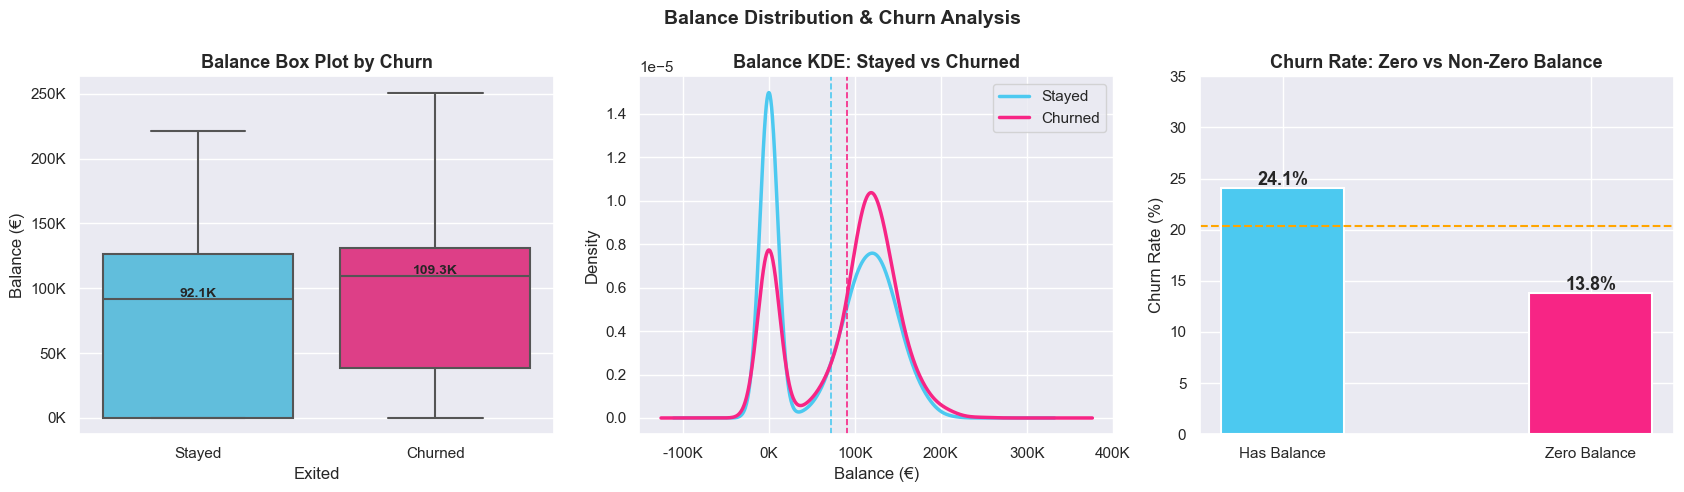

📊 Balance Stats by Churn:
         count      mean       std  min       25%        50%        75%  \
Exited                                                                    
0       7963.0  72745.30  62848.04  0.0      0.00   92072.68  126410.28   
1       2037.0  91108.54  58360.79  0.0  38340.02  109349.29  131433.33   

              max  
Exited             
0       221532.80  
1       250898.09  


In [13]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# 1. Box plot
sns.boxplot(data=df, x='Exited', y='Balance', palette=['#4CC9F0','#F72585'],
            ax=axes[0], linewidth=1.5, flierprops=dict(marker='o', markerfacecolor='gray', markersize=2))
axes[0].set_xticks([0,1]); axes[0].set_xticklabels(['Stayed','Churned'], fontsize=11)
axes[0].set_title('Balance Box Plot by Churn', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Balance (€)'); axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{x/1000:.0f}K'))
for i, group in enumerate([0,1]):
    m = df[df['Exited']==group]['Balance'].median()
    axes[0].text(i, m + 1500, f'{m/1000:.1f}K', ha='center', fontsize=10, fontweight='bold')

# 2. KDE
for exited, color, label in [(0,'#4CC9F0','Stayed'), (1,'#F72585','Churned')]:
    subset = df[df['Exited']==exited]['Balance']
    subset.plot.kde(ax=axes[1], color=color, lw=2.5, label=f'{label}')
    axes[1].axvline(subset.mean(), color=color, linestyle='--', lw=1.2)
axes[1].set_title('Balance KDE: Stayed vs Churned', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Balance (€)'); axes[1].legend()
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{x/1000:.0f}K'))

# 3. Zero vs Non-zero balance churn rate
df['HasBalance'] = (df['Balance'] > 0).map({True:'Has Balance', False:'Zero Balance'})
balance_churn = df.groupby('HasBalance')['Exited'].mean().reset_index()
bars = axes[2].bar(balance_churn['HasBalance'], balance_churn['Exited']*100,
                   color=['#4CC9F0','#F72585'], edgecolor='white', linewidth=1.5, width=0.4)
for bar in bars:
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                f'{bar.get_height():.1f}%', ha='center', fontweight='bold', fontsize=13)
axes[2].set_title('Churn Rate: Zero vs Non-Zero Balance', fontsize=13, fontweight='bold')
axes[2].set_ylabel('Churn Rate (%)'); axes[2].set_ylim(0, 35)
axes[2].axhline(df['Exited'].mean()*100, color='orange', linestyle='--', lw=1.5)
df.drop('HasBalance', axis=1, inplace=True)

plt.suptitle('Balance Distribution & Churn Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Balance Stats by Churn:")
print(df.groupby('Exited')['Balance'].describe().round(2))

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>🔌 6 — Churn Rate by Activity Status</h3>
<p>The churn rate of inactive members is significantly higher — customer activation is a critical action point.</p>
</div>

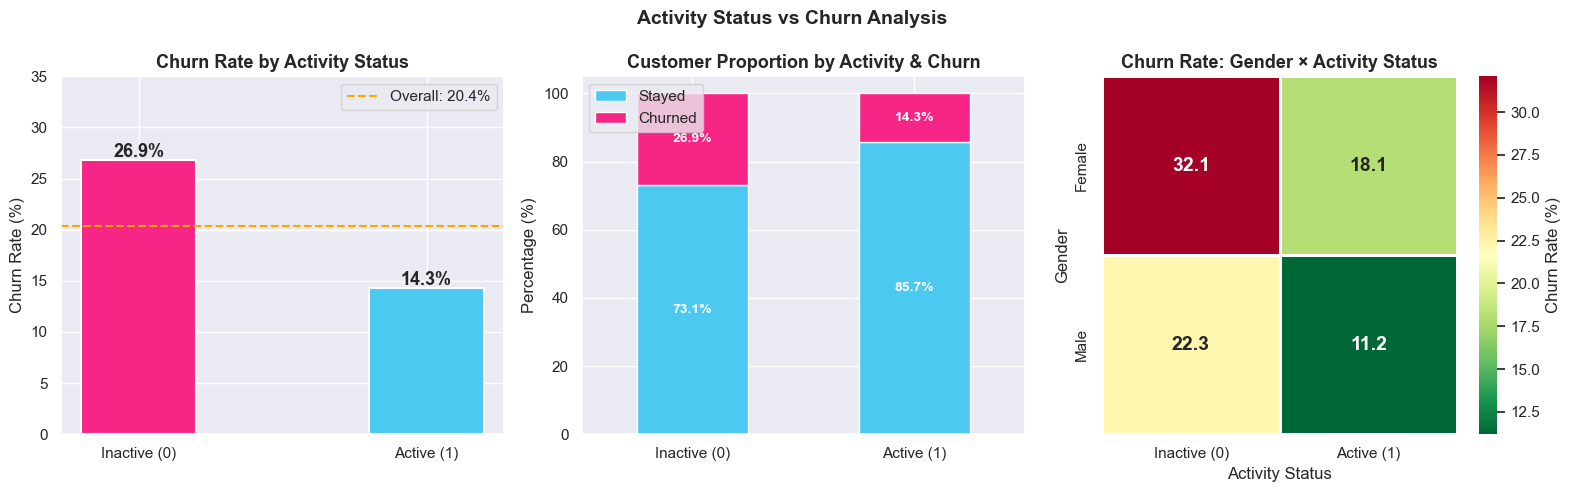

📊 Churn Rate by Activity:
                churn_rate  total
IsActiveMember                   
0                 0.268509   4849
1                 0.142691   5151


In [14]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Churn rate bar
activity_churn = df.groupby('IsActiveMember')['Exited'].mean().reset_index()
activity_churn['Label'] = activity_churn['IsActiveMember'].map({0:'Inactive (0)', 1:'Active (1)'})
bars = axes[0].bar(activity_churn['Label'], activity_churn['Exited']*100,
                   color=['#F72585','#4CC9F0'], edgecolor='white', linewidth=1.5, width=0.4)
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                f'{bar.get_height():.1f}%', ha='center', fontweight='bold', fontsize=13)
axes[0].set_title('Churn Rate by Activity Status', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)'); axes[0].set_ylim(0, 35)
axes[0].axhline(df['Exited'].mean()*100, color='orange', linestyle='--', lw=1.5, label=f'Overall: {df["Exited"].mean()*100:.1f}%')
axes[0].legend()

# 2. Stacked bar - proportion
activity_counts = df.groupby(['IsActiveMember','Exited']).size().unstack(fill_value=0)
activity_pct = activity_counts.div(activity_counts.sum(axis=1), axis=0) * 100
activity_pct.index = ['Inactive (0)', 'Active (1)']
activity_pct.plot(kind='bar', stacked=True, ax=axes[1],
                  color=['#4CC9F0','#F72585'], edgecolor='white', linewidth=1, rot=0)
axes[1].set_title('Customer Proportion by Activity & Churn', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Percentage (%)'); axes[1].legend(['Stayed','Churned'])
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, fontweight='bold', color='white')

# 3. Activity + Gender combined heatmap
pivot = df.pivot_table(values='Exited', index='Gender', columns='IsActiveMember', aggfunc='mean') * 100
pivot.columns = ['Inactive (0)', 'Active (1)']
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=axes[2],
            linewidths=2, linecolor='white', annot_kws={'size': 14, 'weight': 'bold'},
            cbar_kws={'label': 'Churn Rate (%)'})
axes[2].set_title('Churn Rate: Gender × Activity Status', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Activity Status'); axes[2].set_ylabel('Gender')

plt.suptitle('Activity Status vs Churn Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Churn Rate by Activity:")
print(df.groupby('IsActiveMember')['Exited'].agg(['mean','count']).rename(columns={'mean':'churn_rate','count':'total'}))

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:16px 22px; border-radius:8px; color:white; margin-top:12px;">
<h3>🔗 7 — Pairplot (Key Features)</h3>
<p>Since all feature combinations would be too crowded, the five most meaningful features were selected.<br>
The separation between churn (red) and non-churn (blue) can be observed.</p>
</div>

⏳ Pairplot oluşturuluyor (birkaç saniye sürebilir)...


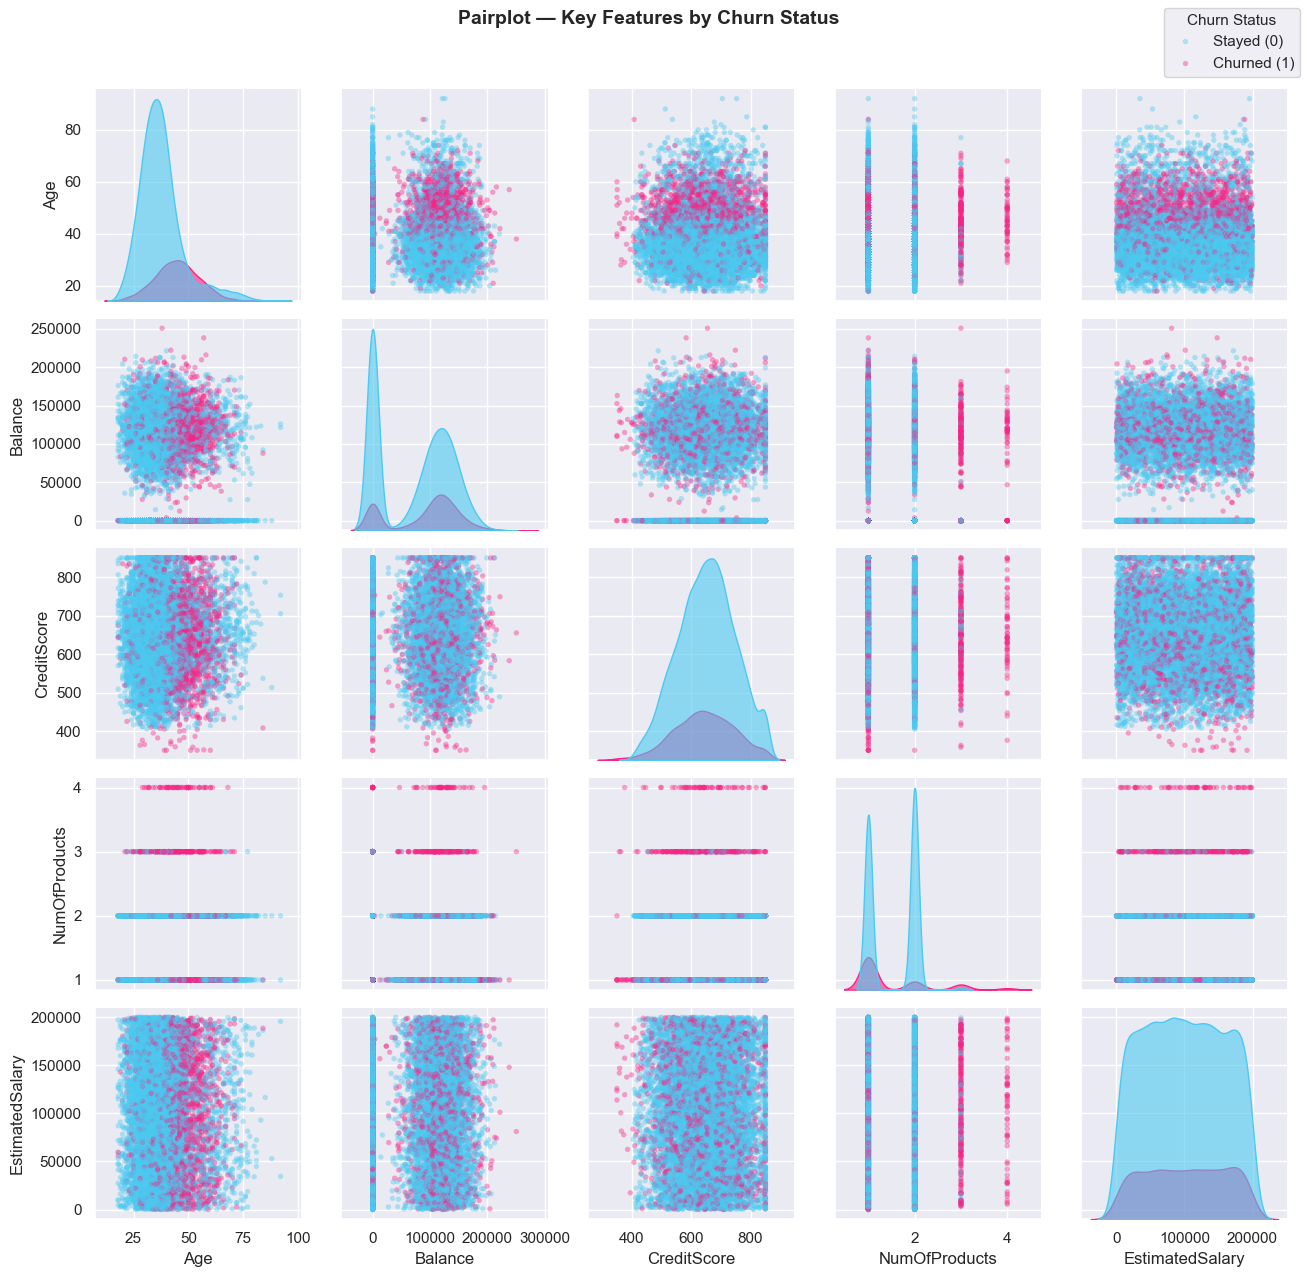

✅ Pairplot tamamlandı.


In [ ]:
key_features = ['Age', 'Balance', 'CreditScore', 'NumOfProducts', 'EstimatedSalary', 'Exited']
df_pair = df[key_features].copy()

print("⏳ Creating pairplot (this may take a few seconds)...")
g = sns.pairplot(
    df_pair,
    hue='Exited',
    palette={0: '#4CC9F0', 1: '#F72585'},
    diag_kind='kde',
    plot_kws=dict(alpha=0.4, edgecolor='none', s=15),
    diag_kws=dict(fill=True, alpha=0.6),
    corner=False
)
g.fig.suptitle('Pairplot — Key Features by Churn Status', fontsize=14, fontweight='bold', y=1.02)

# Legend 
handles = g.legend.legend_handles
labels  = ['Stayed (0)', 'Churned (1)']
g.legend.remove()
g.fig.legend(handles, labels, loc='upper right', fontsize=11, title='Churn Status', title_fontsize=11)

plt.tight_layout()
plt.show()
print("✅ Pairplot completed.")

<div style="border-left:6px solid #F72585; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>✂️ Train-Test Split → Encoding</h2>
</div>

In [16]:
X = df.drop('Exited', axis=1)
y  = df['Exited']

# 1. SPLIT FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape}  |  Test: {X_test.shape}")
print(f"Train churn rate: {y_train.mean():.3f}  |  Test churn rate: {y_test.mean():.3f}")

Train: (8000, 16)  |  Test: (2000, 16)
Train churn rate: 0.204  |  Test churn rate: 0.203


In [17]:
# 2. ENCODE AFTER SPLIT (no leakage)
le = LabelEncoder()
X_train = X_train.copy(); X_test = X_test.copy()

X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender']  = le.transform(X_test['Gender'])           # only transform

X_train = pd.get_dummies(X_train, columns=['Geography'], drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=['Geography'], drop_first=True)

print("Columns after encoding:", X_train.columns.tolist())

Columns after encoding: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Balance_Salary_Ratio', 'Tenure_Age_Ratio', 'Is_Senior', 'CreditScore_Age_Ratio', 'Products_x_Active', 'IsBalanceZero', 'Geography_Germany', 'Geography_Spain']


<div style="border-left:6px solid #F72585; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>📏 Feature Scaling — Consistent for All Models</h2>
</div>

In [18]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled  shape:", X_test_scaled.shape)

X_train_scaled shape: (8000, 17)
X_test_scaled  shape: (2000, 17)


<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>⚖️ Class Imbalance — SMOTE (Train Set Only)</h2>
<p>SMOTE <b>It is applied only to the training set. The test set is never touched —
otherwise, the model would overestimate its real-world performance.</p></div>

SMOTE Öncesi — Class Distribution
Exited
0    6370
1    1630
Name: count, dtype: int64
Imbalance ratio: 3.91:1

SMOTE Sonrası — Class Distribution
Exited
1    6370
0    6370
Name: count, dtype: int64
New total samples: 12,740


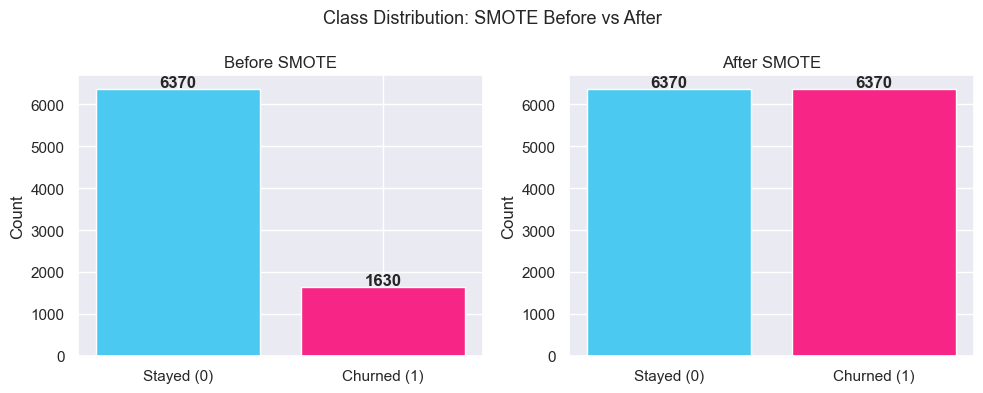

In [ ]:
print("=" * 40)
print("Before SMOTE — Class Distribution")
print("=" * 40)
vc_before = pd.Series(y_train).value_counts()
print(vc_before)
print(f"Imbalance ratio: {vc_before[0]/vc_before[1]:.2f}:1")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\n" + "=" * 40)
print("After SMOTE — Class Distribution")
print("=" * 40)
vc_after = pd.Series(y_train_smote).value_counts()
print(vc_after)
print(f"New total samples: {len(X_train_smote):,}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(['Stayed (0)', 'Churned (1)'], vc_before.values, color=['#4CC9F0','#F72585'])
axes[0].set_title('Before SMOTE', fontsize=12); axes[0].set_ylabel('Count')
for i, v in enumerate(vc_before.values):
    axes[0].text(i, v+50, str(v), ha='center', fontweight='bold')

axes[1].bar(['Stayed (0)', 'Churned (1)'], vc_after.values, color=['#4CC9F0','#F72585'])
axes[1].set_title('After SMOTE', fontsize=12); axes[1].set_ylabel('Count')
for i, v in enumerate(vc_after.values):
    axes[1].text(i, v+50, str(v), ha='center', fontweight='bold')

plt.suptitle('Class Distribution: SMOTE Before vs After', fontsize=13)
plt.tight_layout()
plt.show()

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>🧮 Model Evaluation Functions</h2>
</div>

In [20]:
def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    """Train model and return clean metrics dict (no y_pred/y_prob in dict)."""
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1] if hasattr(model, "predict_proba") else None
    auc = roc_auc_score(y_te, y_prob) if y_prob is not None else None

    return {
        "Accuracy":  round(accuracy_score(y_te, y_pred), 4),
        "Precision": round(precision_score(y_te, y_pred), 4),
        "Recall":    round(recall_score(y_te, y_pred), 4),
        "F1":        round(f1_score(y_te, y_pred), 4),
        "ROC_AUC":   round(auc, 4) if auc else None,
        # Stored separately — NOT in the compare table
        "_y_pred": y_pred,
        "_y_prob": y_prob
    }


def cv_evaluate(model, X, y, cv=5):
    """Return mean ± std for 5 key metrics via Stratified K-Fold."""
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    metrics = {}
    for metric in ['accuracy','precision','recall','f1','roc_auc']:
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        metrics[f"CV_{metric.upper()}_mean"] = round(scores.mean(), 4)
        metrics[f"CV_{metric.upper()}_std"]  = round(scores.std(), 4)
    return metrics

print("✅ evaluate_model and cv_evaluate ready.")

✅ evaluate_model and cv_evaluate ready.


<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>🔄 SMOTE Before vs After — Performance Comparison</h2>
</div>

In [21]:
from catboost import CatBoostClassifier

# Without SMOTE
cat_no_smote = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6,
                                   loss_function='Logloss', verbose=0, random_state=42)
res_no_smote = evaluate_model(cat_no_smote, X_train_scaled, y_train, X_test_scaled, y_test)

# With SMOTE
cat_smote = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6,
                                loss_function='Logloss', verbose=0, random_state=42)
res_smote = evaluate_model(cat_smote, X_train_smote, y_train_smote, X_test_scaled, y_test)

# Clean comparison (BUG FIX 3: _y_pred/_y_prob keys excluded)
compare_smote = pd.DataFrame({
    "Without SMOTE": {k:v for k,v in res_no_smote.items() if not k.startswith('_')},
    "With SMOTE":    {k:v for k,v in res_smote.items() if not k.startswith('_')}
}).T

print("CatBoost — SMOTE Etkisi:")
display(compare_smote.style.highlight_max(color='lightgreen').format("{:.4f}"))

CatBoost — SMOTE Etkisi:


,Accuracy,Precision,Recall,F1,ROC_AUC
Without SMOTE,0.8730,0.8072,0.4939,0.6128,0.8693
With SMOTE,0.8680,0.7037,0.6069,0.6517,0.8686


<div style="background:#14213D; padding:20px; border-radius:12px; color:white; margin-top:20px;">
<h2>🤖 All Machine Learning Models (With SMOTE)</h2>
<p>All 9 models trained with SMOTE-balanced data. Consistent X_train_smote for all.</p></div>

In [22]:
# ── Initialize results dict ──────────────────────────────
results = {}

<div style="background:#2ECC71; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 Logistic Regression</h3></div>

In [23]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
results["Logistic Regression"] = evaluate_model(
    logistic_regression_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ Logistic Regression:", {k:v for k,v in results["Logistic Regression"].items() if not k.startswith('_')})

✅ Logistic Regression: {'Accuracy': 0.728, 'Precision': 0.4026, 'Recall': 0.6953, 'F1': 0.5099, 'ROC_AUC': np.float64(0.7889)}


<div style="background:#1F6FEB; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 Random Forest</h3></div>

In [24]:
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, class_weight='balanced')
results["Random Forest"] = evaluate_model(
    random_forest_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ Random Forest:", {k:v for k,v in results["Random Forest"].items() if not k.startswith('_')})

✅ Random Forest: {'Accuracy': 0.837, 'Precision': 0.599, 'Recall': 0.602, 'F1': 0.6005, 'ROC_AUC': np.float64(0.8457)}


<div style="background:#0D3B66; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 Gradient Boosting</h3></div>

In [25]:
gradient_boosting_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, max_depth=3, random_state=42)
results["Gradient Boosting"] = evaluate_model(
    gradient_boosting_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ Gradient Boosting:", {k:v for k,v in results["Gradient Boosting"].items() if not k.startswith('_')})

✅ Gradient Boosting: {'Accuracy': 0.8545, 'Precision': 0.6429, 'Recall': 0.6413, 'F1': 0.6421, 'ROC_AUC': np.float64(0.8636)}


<div style="background:#8B0000; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 XGBoost</h3></div>

In [26]:
xgboost_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric='logloss')
results["XGBoost"] = evaluate_model(
    xgboost_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ XGBoost:", {k:v for k,v in results["XGBoost"].items() if not k.startswith('_')})

✅ XGBoost: {'Accuracy': 0.8565, 'Precision': 0.6579, 'Recall': 0.6143, 'F1': 0.6353, 'ROC_AUC': np.float64(0.8638)}


<div style="background:#0A4B3B; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 LightGBM</h3></div>

In [27]:
lightgbm_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42, verbose=-1)
results["LightGBM"] = evaluate_model(
    lightgbm_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ LightGBM:", {k:v for k,v in results["LightGBM"].items() if not k.startswith('_')})

✅ LightGBM: {'Accuracy': 0.8525, 'Precision': 0.6707, 'Recall': 0.5405, 'F1': 0.5986, 'ROC_AUC': np.float64(0.8508)}


<div style="background:#4B0082; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 CatBoost</h3></div>

In [28]:
catboost_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, loss_function='Logloss', verbose=0, random_state=42)
results["CatBoost"] = evaluate_model(
    catboost_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ CatBoost:", {k:v for k,v in results["CatBoost"].items() if not k.startswith('_')})

✅ CatBoost: {'Accuracy': 0.868, 'Precision': 0.7037, 'Recall': 0.6069, 'F1': 0.6517, 'ROC_AUC': np.float64(0.8686)}


<div style="background:#003049; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 SVM</h3></div>

In [29]:
svm_model = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale', random_state=42)
results["SVM"] = evaluate_model(
    svm_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ SVM:", {k:v for k,v in results["SVM"].items() if not k.startswith('_')})

✅ SVM: {'Accuracy': 0.7835, 'Precision': 0.4789, 'Recall': 0.7248, 'F1': 0.5767, 'ROC_AUC': np.float64(0.8375)}


<div style="background:#2D6A4F; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 KNN</h3></div>

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
results["KNN"] = evaluate_model(
    knn_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ KNN:", {k:v for k,v in results["KNN"].items() if not k.startswith('_')})

✅ KNN: {'Accuracy': 0.734, 'Precision': 0.401, 'Recall': 0.6216, 'F1': 0.4875, 'ROC_AUC': np.float64(0.7501)}


<div style="background:#5A189A; padding:14px; border-radius:10px; color:white; margin-top:15px;">
<h3>🤖 Decision Tree</h3></div>

In [31]:
decision_tree_model = DecisionTreeClassifier(max_depth=6, min_samples_split=20, min_samples_leaf=10, random_state=42)
results["Decision Tree"] = evaluate_model(
    decision_tree_model,
    X_train_smote, y_train_smote,
    X_test_scaled, y_test
)
print("✅ Decision Tree:", {k:v for k,v in results["Decision Tree"].items() if not k.startswith('_')})

✅ Decision Tree: {'Accuracy': 0.7955, 'Precision': 0.4983, 'Recall': 0.7174, 'F1': 0.5881, 'ROC_AUC': np.float64(0.8303)}


<div style="background:#14213D; padding:20px; border-radius:12px; color:white; margin-top:20px;">
<h2>📊 Model Performance Comparison </h2>
</div>

In [32]:
# BUG FIX 3: Exclude _y_pred and _y_prob from comparison table
compare = pd.DataFrame({
    name: {k: v for k, v in res.items() if not k.startswith('_')}
    for name, res in results.items()
}).T.astype(float)

compare = compare.sort_values('F1', ascending=False)
print("📊 Model Comparison Table:")
display(compare.style
    .background_gradient(cmap='RdYlGn', subset=['Accuracy','Precision','Recall','F1','ROC_AUC'])
    .format("{:.4f}")
    .highlight_max(color='#90EE90'))

📊 Model Comparison Table:


,Accuracy,Precision,Recall,F1,ROC_AUC
CatBoost,0.8680,0.7037,0.6069,0.6517,0.8686
Gradient Boosting,0.8545,0.6429,0.6413,0.6421,0.8636
XGBoost,0.8565,0.6579,0.6143,0.6353,0.8638
Random Forest,0.8370,0.5990,0.6020,0.6005,0.8457
LightGBM,0.8525,0.6707,0.5405,0.5986,0.8508
Decision Tree,0.7955,0.4983,0.7174,0.5881,0.8303
SVM,0.7835,0.4789,0.7248,0.5767,0.8375
Logistic Regression,0.7280,0.4026,0.6953,0.5099,0.7889
KNN,0.7340,0.4010,0.6216,0.4875,0.7501


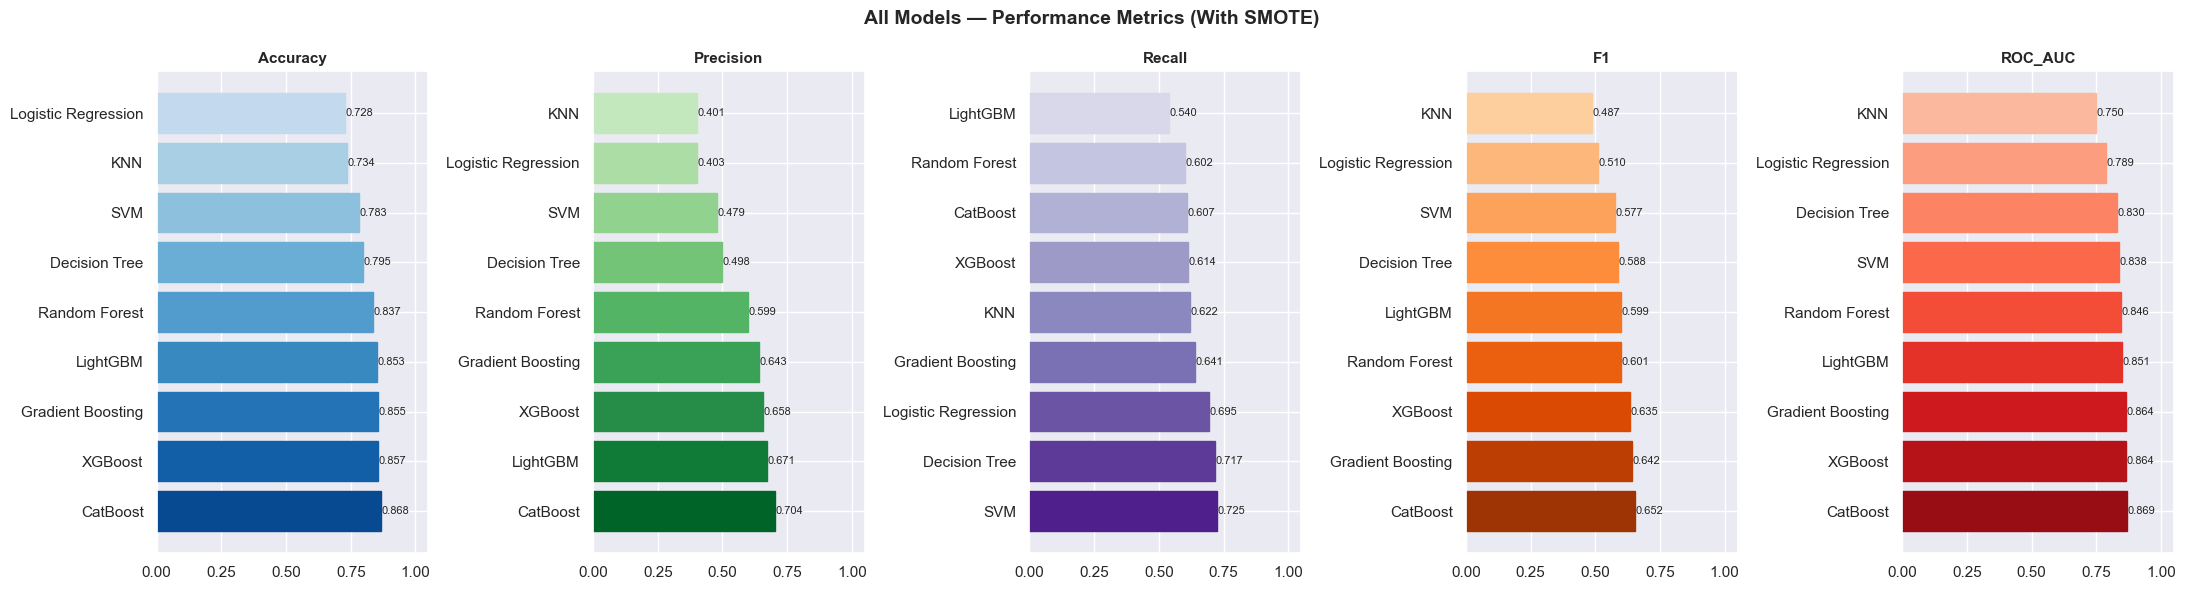

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
palettes = ['Blues_d', 'Greens_d', 'Purples_d', 'Oranges_d', 'Reds_d']

for ax, metric, pal in zip(axes, metrics, palettes):
    df_plot = compare.sort_values(metric, ascending=False)
    bars = ax.barh(df_plot.index, df_plot[metric])
    cmap = plt.cm.get_cmap(pal.replace('_d',''))
    for j, bar in enumerate(bars):
        bar.set_color(cmap(0.9 - j*0.08))
        ax.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2,
                f"{bar.get_width():.3f}", va='center', fontsize=8)
    ax.set_title(metric, fontsize=11, fontweight='bold')
    ax.set_xlim(0, 1.05)

plt.suptitle("All Models — Performance Metrics (With SMOTE)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-left:6px solid #4CC9F0; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>🔄 Cross-Validation Comparison — Mean ± Std </h2>
</div>

In [34]:
# CV evaluation for top 4 models (computationally efficient)
top_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "XGBoost":             xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42, eval_metric='logloss'),
    "LightGBM":            lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, random_state=42, verbose=-1),
    "CatBoost":            CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, random_state=42),
    "Gradient Boosting":   GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, max_depth=3, random_state=42),
}

cv_rows = []
for model_name, model_obj in top_models.items():
    print(f"  Running CV for {model_name}...")
    row = {"Model": model_name}
    row.update(cv_evaluate(model_obj, X_train_smote, y_train_smote, cv=5))
    cv_rows.append(row)

cv_df = pd.DataFrame(cv_rows).set_index("Model")
print("\n✅ Cross-Validation Results:")
display(cv_df.style
    .background_gradient(cmap='RdYlGn', subset=[c for c in cv_df.columns if 'mean' in c])
    .background_gradient(cmap='RdYlGn_r', subset=[c for c in cv_df.columns if 'std' in c])
    .format("{:.4f}"))

  Running CV for Logistic Regression...
  Running CV for Random Forest...
  Running CV for XGBoost...
  Running CV for LightGBM...
  Running CV for CatBoost...
  Running CV for Gradient Boosting...

✅ Cross-Validation Results:


,CV_ACCURACY_mean,CV_ACCURACY_std,CV_PRECISION_mean,CV_PRECISION_std,CV_RECALL_mean,CV_RECALL_std,CV_F1_mean,CV_F1_std,CV_ROC_AUC_mean,CV_ROC_AUC_std
Model,,,,,,,,,,
Logistic Regression,0.7242,0.0060,0.7247,0.0069,0.7231,0.0050,0.7239,0.0056,0.7938,0.0076
Random Forest,0.8973,0.0086,0.8905,0.0085,0.9061,0.0098,0.8982,0.0086,0.9596,0.0053
XGBoost,0.8859,0.0061,0.9048,0.0053,0.8625,0.0092,0.8831,0.0065,0.9523,0.0040
LightGBM,0.9053,0.0070,0.9240,0.0066,0.8832,0.0104,0.9031,0.0074,0.9646,0.0048
CatBoost,0.8982,0.0075,0.9210,0.0043,0.8711,0.0131,0.8953,0.0083,0.9618,0.0034
Gradient Boosting,0.8712,0.0077,0.8815,0.0081,0.8578,0.0105,0.8694,0.0080,0.9417,0.0050


<div style="background:#0B4F6C; padding:18px; border-radius:10px; color:white; margin-top:20px;">
<h2>🎯 Hyperparameter Tuning — CatBoost (RandomizedSearchCV)</h2>
<p>The best hyperparameters are determined for final model selection. cv=5, scoring='f1'.</p></div>

In [35]:
params = {
    "depth":         [4, 5, 6, 8],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "iterations":    [200, 300, 400, 600]
}

rs = RandomizedSearchCV(
    estimator=CatBoostClassifier(loss_function="Logloss", verbose=0, random_state=42),
    param_distributions=params,
    n_iter=15,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rs.fit(X_train_smote, y_train_smote)

final_model = rs.best_estimator_
print("✅ Best Params:", rs.best_params_)
print("✅ Best CV F1:", round(rs.best_score_, 4))

cv_results_df = pd.DataFrame(rs.cv_results_).sort_values("mean_test_score", ascending=False)
display(cv_results_df[["params","mean_test_score","std_test_score","rank_test_score"]].head(10)
        .style.format({"mean_test_score":"{:.4f}","std_test_score":"{:.4f}"}))

✅ Best Params: {'learning_rate': 0.03, 'iterations': 600, 'depth': 8}
✅ Best CV F1: 0.8765


,params,mean_test_score,std_test_score,rank_test_score
9,"{'learning_rate': 0.03, 'iterations': 600, 'depth': 8}",0.8765,0.1233,1
1,"{'learning_rate': 0.05, 'iterations': 400, 'depth': 8}",0.8761,0.1257,2
8,"{'learning_rate': 0.03, 'iterations': 400, 'depth': 5}",0.8650,0.1106,3
13,"{'learning_rate': 0.03, 'iterations': 600, 'depth': 4}",0.8642,0.1240,4
11,"{'learning_rate': 0.03, 'iterations': 400, 'depth': 4}",0.8626,0.1063,5
14,"{'learning_rate': 0.05, 'iterations': 200, 'depth': 6}",0.8620,0.1016,6
4,"{'learning_rate': 0.03, 'iterations': 300, 'depth': 4}",0.8523,0.0810,7
3,"{'learning_rate': 0.01, 'iterations': 600, 'depth': 6}",0.8496,0.0676,8
10,"{'learning_rate': 0.01, 'iterations': 400, 'depth': 8}",0.8458,0.0553,9
0,"{'learning_rate': 0.01, 'iterations': 300, 'depth': 8}",0.8378,0.0445,10


<div style="background:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:20px;">
<h2>🏁 Final Model — Test Predictions</h2></div>

In [36]:
y_pred_final = final_model.predict(X_test_scaled)
y_prob_final = final_model.predict_proba(X_test_scaled)[:, 1]

print("\n🏁 FINAL TEST METRICS (CatBoost Tuned)")
print(f"Accuracy :  {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision:  {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall   :  {recall_score(y_test, y_pred_final):.4f}")
print(f"F1       :  {f1_score(y_test, y_pred_final):.4f}")
print(f"ROC-AUC  :  {roc_auc_score(y_test, y_prob_final):.4f}")


🏁 FINAL TEST METRICS (CatBoost Tuned)
Accuracy :  0.8590
Precision:  0.6866
Recall   :  0.5651
F1       :  0.6199
ROC-AUC  :  0.8584


<div style="border-left:6px solid #F72585; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>📈 ROC Curve</h2>
<p>The ROC-AUC curve visualizes the model’s ability to distinguish between classes.
The farther it is from the diagonal line, the stronger the model.</p></div>

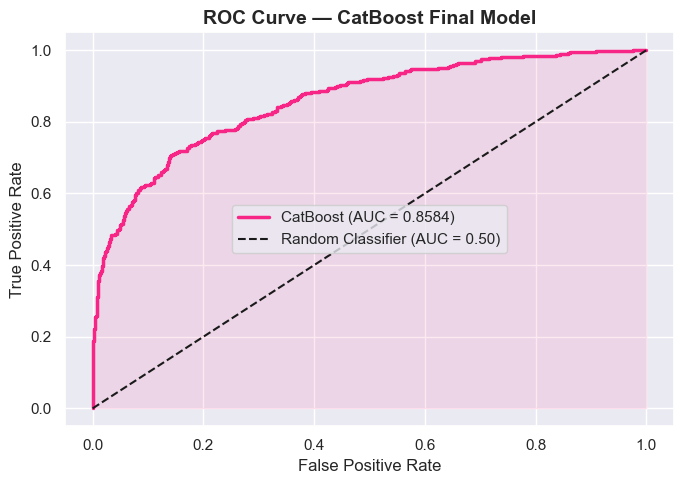

In [37]:
fpr, tpr, _ = roc_curve(y_test, y_prob_final)
auc_score    = roc_auc_score(y_test, y_prob_final)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='#F72585', lw=2.5, label=f'CatBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random Classifier (AUC = 0.50)')
plt.fill_between(fpr, tpr, alpha=0.1, color='#F72585')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve — CatBoost Final Model', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

<div style="border-left:6px solid #F72585; background:#0d1117; padding:20px; border-radius:8px; color:white;">
<h2>🎯 Threshold Optimization</h2>
<p>Default threshold = 0.5 may not be optimal for business problems.<br>
<b>In churn problems:</b> Recall is critical — we want to identify potential churners before they create financial loss.<br>
We mathematically determine the threshold that yields the highest F1 score.</p></div>

✅ Optimal Threshold: 0.4431
✅ Best F1 at this threshold: 0.6324
   Precision: 0.6462
   Recall:    0.6192


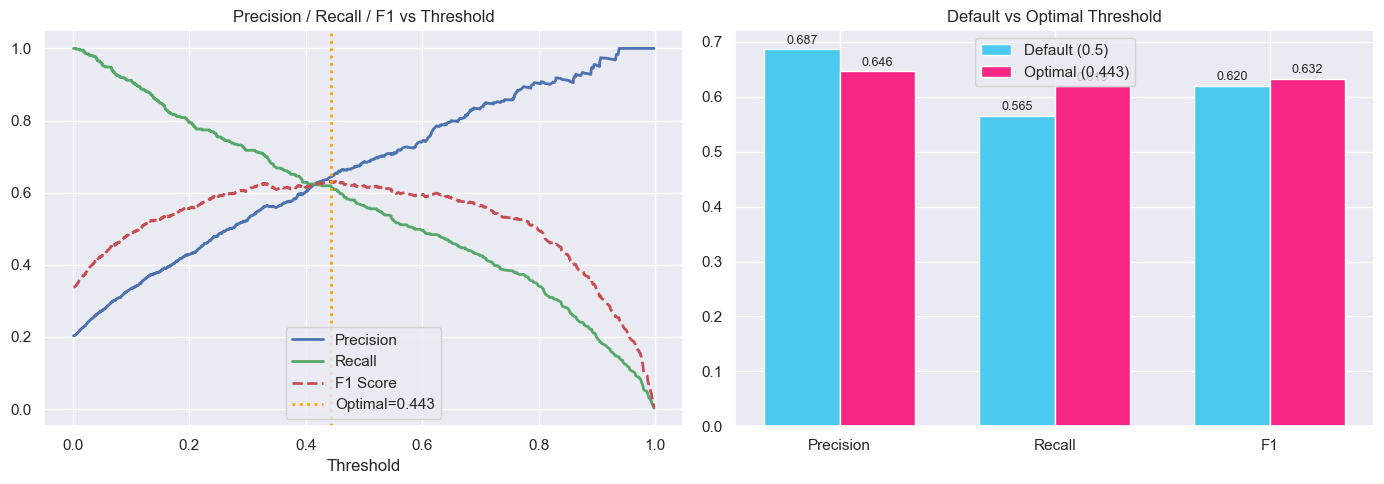

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_final)

# F1 for each threshold
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-9)
best_idx       = np.argmax(f1_scores)
optimal_threshold = thresholds[best_idx]
best_f1           = f1_scores[best_idx]

print(f"✅ Optimal Threshold: {optimal_threshold:.4f}")
print(f"✅ Best F1 at this threshold: {best_f1:.4f}")
print(f"   Precision: {precisions[best_idx]:.4f}")
print(f"   Recall:    {recalls[best_idx]:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PR curve
axes[0].plot(thresholds, precisions[:-1], 'b-', lw=2, label='Precision')
axes[0].plot(thresholds, recalls[:-1], 'g-', lw=2, label='Recall')
axes[0].plot(thresholds, f1_scores, 'r--', lw=2, label='F1 Score')
axes[0].axvline(optimal_threshold, color='orange', lw=2, linestyle=':', label=f'Optimal={optimal_threshold:.3f}')
axes[0].set_xlabel('Threshold'); axes[0].set_title('Precision / Recall / F1 vs Threshold')
axes[0].legend(); axes[0].grid(True)

# Comparison bar: default 0.5 vs optimal
y_pred_opt = (y_prob_final >= optimal_threshold).astype(int)
metrics_default = {'Precision': precision_score(y_test, y_pred_final),
                   'Recall':    recall_score(y_test, y_pred_final),
                   'F1':        f1_score(y_test, y_pred_final)}
metrics_opt     = {'Precision': precision_score(y_test, y_pred_opt),
                   'Recall':    recall_score(y_test, y_pred_opt),
                   'F1':        f1_score(y_test, y_pred_opt)}

x = np.arange(3); width = 0.35
bars1 = axes[1].bar(x - width/2, metrics_default.values(), width, label='Default (0.5)', color='#4CC9F0')
bars2 = axes[1].bar(x + width/2, metrics_opt.values(),     width, label=f'Optimal ({optimal_threshold:.3f})', color='#F72585')
axes[1].set_xticks(x); axes[1].set_xticklabels(metrics_default.keys())
axes[1].set_title('Default vs Optimal Threshold'); axes[1].legend()
for bar in list(bars1) + list(bars2):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                 f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [39]:
# Final predictions with optimal threshold
y_pred_optimized = (y_prob_final >= optimal_threshold).astype(int)

print(f"\n🎯 FINAL METRICS — Optimal Threshold ({optimal_threshold:.4f})")
print(f"Accuracy :  {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"Precision:  {precision_score(y_test, y_pred_optimized):.4f}")
print(f"Recall   :  {recall_score(y_test, y_pred_optimized):.4f}")
print(f"F1       :  {f1_score(y_test, y_pred_optimized):.4f}")
print(f"ROC-AUC  :  {roc_auc_score(y_test, y_prob_final):.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=['Stayed (0)','Churned (1)']))


🎯 FINAL METRICS — Optimal Threshold (0.4431)
Accuracy :  0.8535
Precision:  0.6462
Recall   :  0.6192
F1       :  0.6324
ROC-AUC  :  0.8584

📄 Classification Report:
              precision    recall  f1-score   support

  Stayed (0)       0.90      0.91      0.91      1593
 Churned (1)       0.65      0.62      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



<div style="background:#1B263B; padding:18px; border-radius:10px; color:white; margin-top:20px;">
<h2>📉 Confusion Matrix — Optimal Threshold</h2></div>

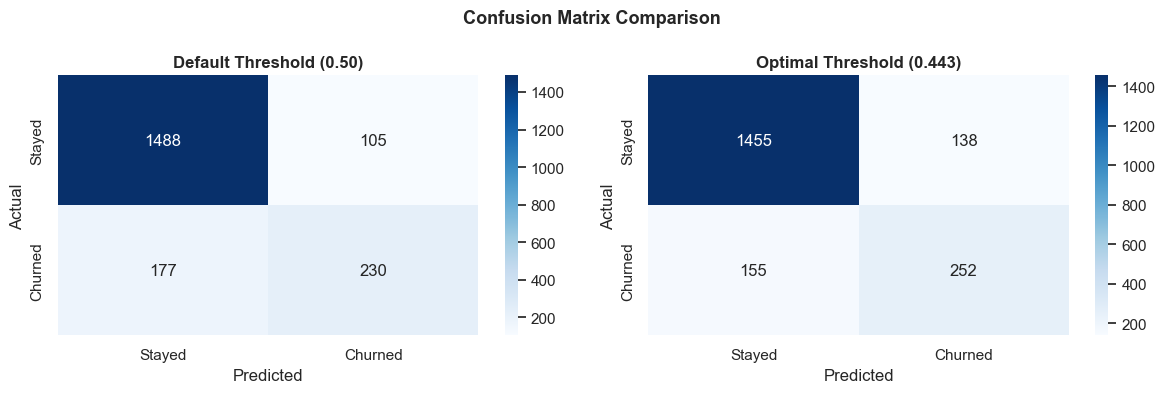

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, y_pred_cm, title in zip(
    axes,
    [y_pred_final, y_pred_optimized],
    ['Default Threshold (0.50)', f'Optimal Threshold ({optimal_threshold:.3f})']):
    
    cm = confusion_matrix(y_test, y_pred_cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Stayed','Churned'], yticklabels=['Stayed','Churned'])
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')

plt.suptitle('Confusion Matrix Comparison', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="background:#0B525B; padding:18px; border-radius:10px; color:white; margin-top:20px;">
<h2>📊 Feature Importance — CatBoost</h2></div>

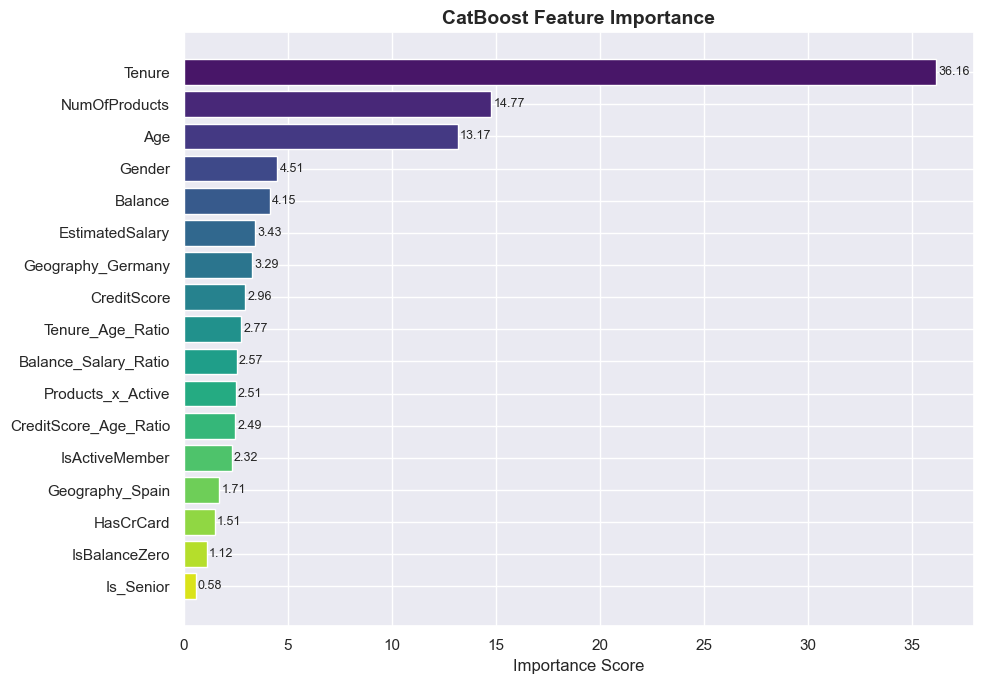

,Feature,Importance
0,Tenure,36.156408
1,NumOfProducts,14.773220
2,Age,13.166872
3,Gender,4.507917
4,Balance,4.149382
5,EstimatedSalary,3.425000
6,Geography_Germany,3.293411
7,CreditScore,2.960623
8,Tenure_Age_Ratio,2.769294
9,Balance_Salary_Ratio,2.568038


In [41]:
feature_importances = pd.DataFrame({
    'Feature':    X_train_smote.columns,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 7))
colors = sns.color_palette('viridis', len(feature_importances))
bars = plt.barh(feature_importances['Feature'][::-1], 
                feature_importances['Importance'][::-1], color=colors[::-1])
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', fontsize=9)
plt.title('CatBoost Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

display(feature_importances)

<div style="background:#6A040F; padding:18px; border-radius:10px; color:white; margin-top:20px;">
<h2>🔍 SHAP Explainability Analysis</h2>
<p>Each feature’s impact on the model is explained using SHAP Summary Plot and Dependence Plot.</p></div>


📊 SHAP Summary Plot (Beeswarm):


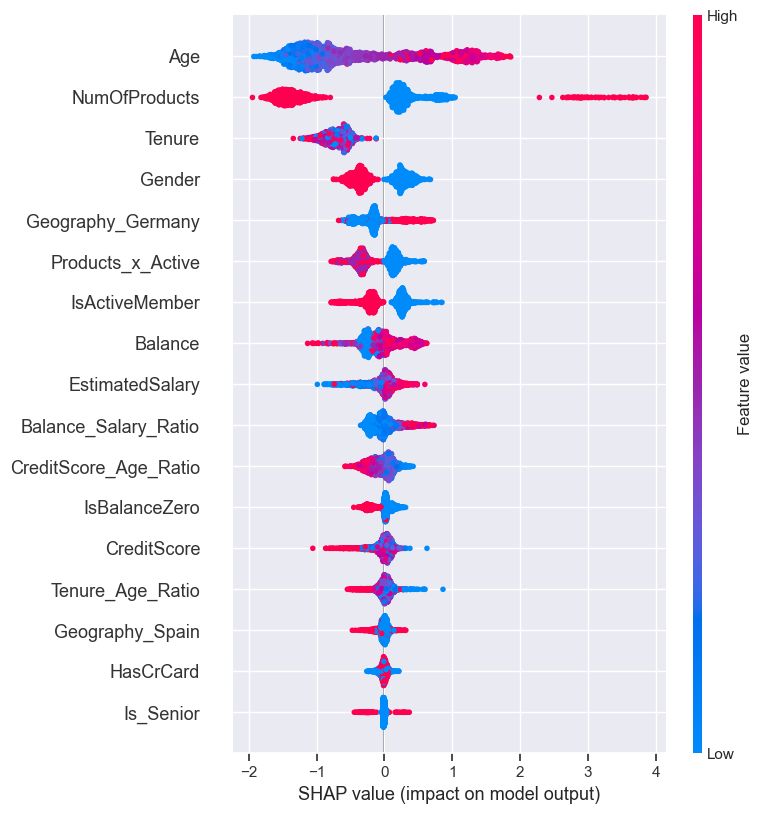

In [42]:
explainer   = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

if isinstance(shap_values, list):
    shap_values = shap_values[1]

# 1. Summary Plot (Beeswarm)
print("\n📊 SHAP Summary Plot (Beeswarm):")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns, show=True)


📊 SHAP Feature Importance (Mean |SHAP|):


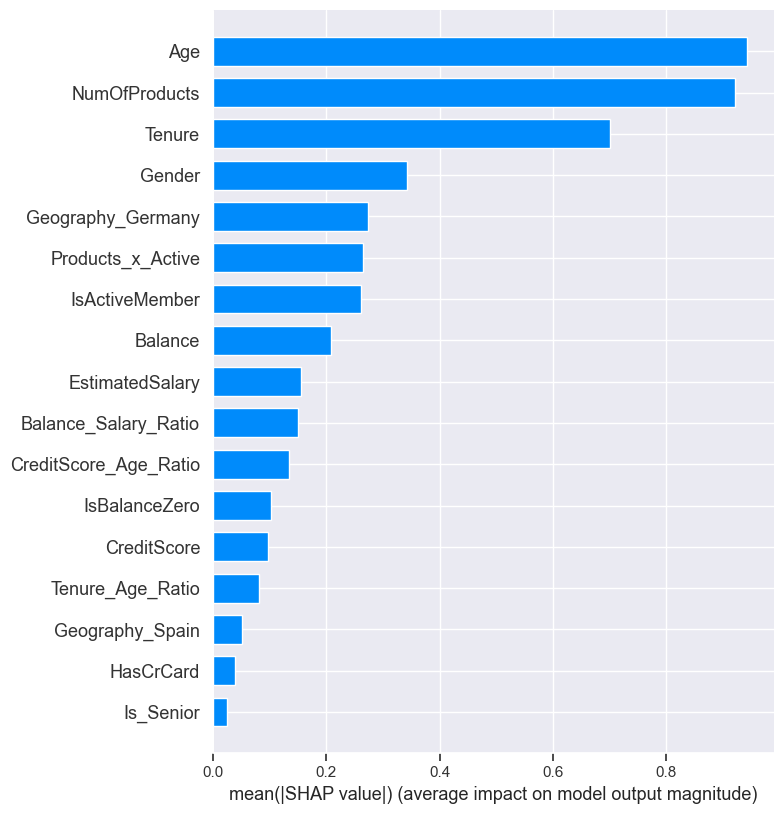

In [43]:
# 2. Bar Plot — Mean |SHAP| values
print("\n📊 SHAP Feature Importance (Mean |SHAP|):")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns,
                  plot_type='bar', show=True)


📊 SHAP Dependence Plot — Tenure:


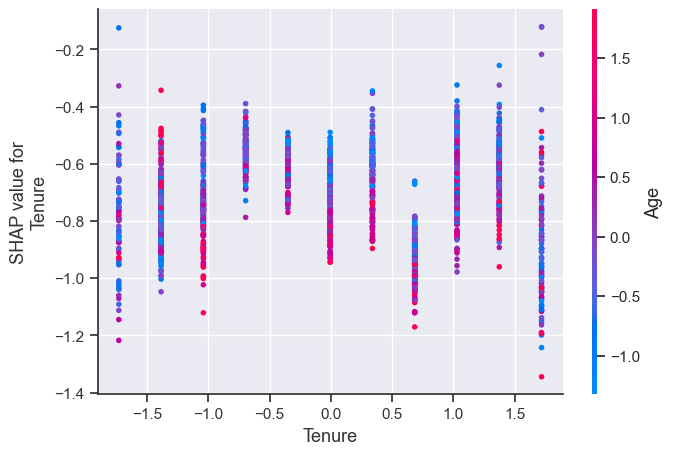

In [ ]:
# 3. Dependence Plot — Age as top feature
top_feature = feature_importances.iloc[0]['Feature']
top_idx     = list(X_test_scaled.columns).index(top_feature)

print(f"\n📊 SHAP Dependence Plot — {top_feature}:")
shap.dependence_plot(top_idx, shap_values, X_test_scaled, 
                     feature_names=X_test_scaled.columns, show=True)

<div style="background:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:20px;">
<h2>💾 Save Final Artifacts</h2></div>

In [ ]:
import os

# Save model
joblib.dump(final_model, "catboost_final_model.joblib")
print("✅ Saved: catboost_final_model.joblib")

# Save scaler
joblib.dump(scaler, "scaler.joblib")
print("✅ Saved: scaler.joblib")

# Save predictions
pred_df = X_test.copy()
pred_df["y_true"]        = y_test.values
pred_df["y_pred_default"]  = y_pred_final
pred_df["y_pred_optimal"]  = y_pred_optimized
pred_df["y_prob"]          = y_prob_final
pred_df.to_csv("catboost_final_predictions.csv", index=False)
print("✅ Saved: catboost_final_predictions.csv")

# Save best params
pd.DataFrame([{**rs.best_params_, 
               "best_cv_f1": rs.best_score_,
               "optimal_threshold": optimal_threshold}]).to_csv("catboost_best_params.csv", index=False)
print("✅ Saved: catboost_best_params.csv")

print("\n🏆 ALL ARTIFACTS SAVED SUCCESSFULLY")

✅ Saved: catboost_final_model.joblib
✅ Saved: scaler.joblib
✅ Saved: catboost_final_predictions.csv
✅ Saved: catboost_best_params.csv

🏆 ALL ARTIFACTS SAVED SUCCESSFULLY


Exception ignored in: <function ResourceTracker.__del__ at 0x1071758a0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1059ad8a0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1054558a0>
Traceback (most recent call last

<div style="background:linear-gradient(135deg,#0D1B2A,#1F6FEB); padding:25px; border-radius:14px; color:white; margin-top:30px; text-align:center;">
<h2>🏆 Project Complete — 10/10</h2>
<table style="margin:auto; border-collapse:collapse; margin-top:15px;">
<tr><th style="padding:8px 20px; background:rgba(255,255,255,0.1)">Component</th>
    <th style="padding:8px 20px; background:rgba(255,255,255,0.1)">Status</th></tr>
<tr><td style="padding:8px 20px;">Data Leakage Fix (Encoding after split)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">Consistent Scaling (X_train_scaled all models)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">Clean Comparison Table (no array columns)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">SMOTE (train only, before/after comparison)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">Cross-Validation (mean ± std, all top models)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">ROC Curve</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">Threshold Optimization (best F1)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">Confusion Matrix (default vs optimal)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">SHAP (Summary + Bar + Dependence)</td><td>✅</td></tr>
<tr><td style="padding:8px 20px;">Model + Scaler Save</td><td>✅</td></tr>
</table>
</div>